In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('merged_jobs_final.csv')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Get information about the dataframe to check data types and missing values
print(df.info())

                                               title remote_work  \
0          Ingénieur Full-Stack | Casablanca (Maroc)     Hybride   
1      Test Manager Anglophone (H/F) | Rabat (Maroc)     Hybride   
2  Digital Campaign Production Manager | Casablan...     Hybride   
3             Click & Webmaster | Casablanca (Maroc)     Hybride   
4    Click User Support Manager | Casablanca (Maroc)     Hybride   

  contract_type Competence    end_date  \
0           CDI        NaN  10/08/2025   
1           CDI        NaN  10/08/2025   
2           CDI        NaN  10/08/2025   
3           CDI        NaN  21/06/2025   
4           CDI        NaN  21/06/2025   

                                 company_description  \
0  «Tous nos postes sont ouverts au télétravail.»...   
1  AXA Services Maroc est le centre d'expertise e...   
2  Orange Business est l’entité du Groupe Orange ...   
3  Orange Business est l’entité du Groupe Orange ...   
4  Orange Business est l’entité du Groupe Orange ...   

 

In [2]:
# Convert 'posted_date' to datetime objects
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce', format='%d/%m/%Y')

# Extract the year from 'posted_date'
df['year'] = df['posted_date'].dt.year

# Filter out rows where 'year' is NaN and create a *copy* to avoid SettingWithCopyWarning
df_filtered = df.dropna(subset=['year']).copy()

# Convert 'year' to integer type
df_filtered['year'] = df_filtered['year'].astype(int)

# Count the number of job offers per year
job_offers_by_year = df_filtered['year'].value_counts().sort_index()


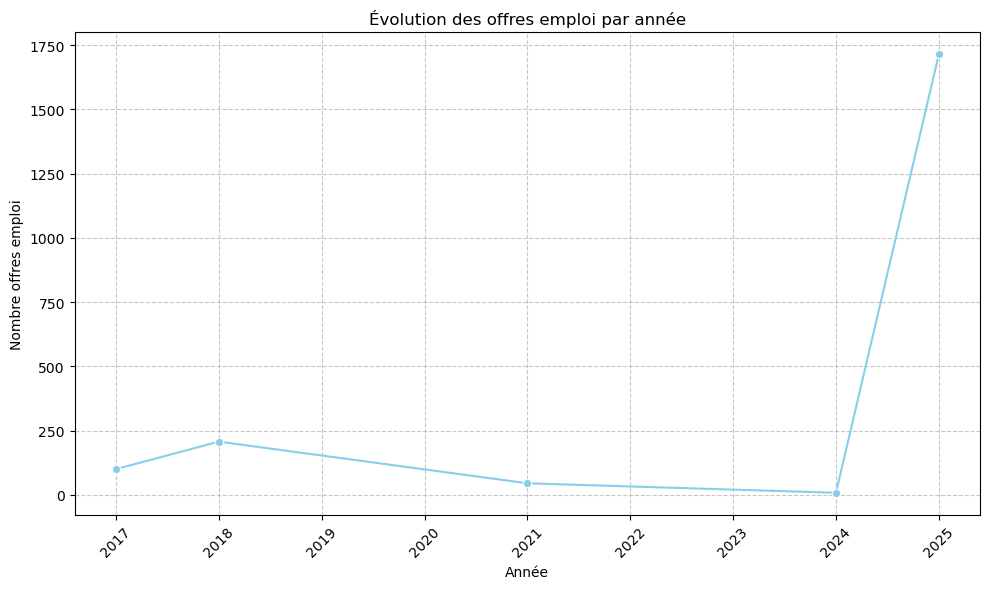

In [3]:
# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=job_offers_by_year.index, y=job_offers_by_year.values, marker='o', color='skyblue')
plt.title('Évolution des offres emploi par année')
plt.xlabel('Année')
plt.ylabel('Nombre offres emploi')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('evolution_offres_emploi_par_annee.png')
plt.show()